<a href="https://colab.research.google.com/github/gnaneswar-18/knn-1/blob/main/knn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import random

file_path='/content/Social_Network_Ads.csv'
dataset=pd.read_csv(file_path)
print(dataset.head())
print(dataset.shape)
x=dataset[['Age', 'EstimatedSalary']].values
y=dataset['Purchased'].values


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
(400, 5)


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print("Train data dimensions:", x_train.shape, y_train.shape)
print("Test data dimensions:", x_test.shape, y_test.shape)


Training data shape: (320, 2) (320,)
Testing data shape: (80, 2) (80,)


In [ ]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1-point2)**2))

def knn(x_input_train,y_train,x_test,k=3):
    y_pred = []
    for test_point in x_test:
        distances=[euclidean_distance(test_point, x_train) for x_train in x_train]
        neighbors_indices=np.argsort(distances)[:k]
        neighbors_labels=[y_train[i] for i in neighbors_indices]
        most_common=Counter(neighbors_labels).most_common(1)[0][0]
        y_pred.append(most_common)
    return np.array(y_pred)
k=3
y_pred=knn(x_train, y_train, x_test, k=k)
print("predicted labels",y_pred)
print("actual labels",y_test)


predicted labels [1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 1]
actual labels [0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 1 0 1]


In [ ]:
def accuracy(y_actual,y_pred):
    correct=np.sum(y_actual == y_pred)
    return correct/len(y_actual)

def confusion_matrix(y_actual,y_pred):
    unique_classes=np.unique(y_actual)
    matrix=np.zeros((len(unique_classes),len(unique_classes)),dtype=int)

    for true_label,pred_label in zip(y_actual,y_pred):
        matrix[int(true_label), int(pred_label)]+=1

    return matrix

acc = accuracy(y_test, y_pred)
print("accuracy: {acc * 100:.2f}%")
conf_matrix=confusion_matrix(y_test, y_pred)
print("confusion Matrix:\n", conf_matrix)


accuracy: {acc * 100:.2f}%
confusion Matrix:
 [[47  5]
 [ 8 20]]


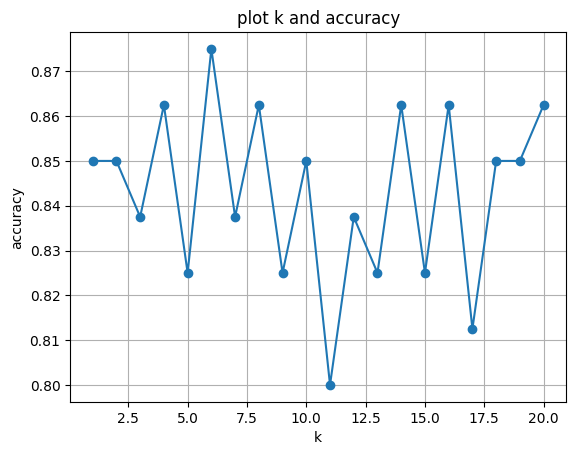

In [ ]:
import matplotlib.pyplot as plt
def plot_k_vs_accuracy(X_train, y_train, X_test, y_test):
    k_values = range(1, 21)
    accuracies = []
    for k in k_values:
        y_pred = knn(X_train, y_train, X_test, k)
        acc = accuracy(y_test, y_pred)
        accuracies.append(acc)
    plt.plot(k_values, accuracies, marker='o')
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.title('plot k and accuracy')
    plt.grid(True)
    plt.show()
plot_k_vs_accuracy(x_train, y_train, x_test, y_test)
